In [1]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [2]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [ ]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Ukol 1

In [3]:
d1 = np.pi * (np.array([49,49,47,42,44])/180 + np.array([26,0,36,48,42])/(60*180) + np.array([25,42,43,28,12])/(60*60*180))
d2 = np.pi * (np.array([169,168,167,162,164])/180 + np.array([23,57,33,45,39])/(60*180) + np.array([43,29,58,27,16])/(60*60*180))
phi_arr = (d2 - d1)/2
phi = mean(phi_arr)
sphi = error(phi_arr)
phi.round(5), sphi.round(5)

(1.04677, 1e-05)

In [4]:
(np.sqrt(2*0.2**2)*np.pi/(60*60*180)).round(6) ## chyba mereni

1e-06

In [5]:
T = np.array([d1,d2,phi_arr]).round(5).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 0.8629  & 2.95651 & 1.0468  \\
 0.85541 & 2.94887 & 1.04673 \\
 0.83099 & 2.92458 & 1.0468  \\
 0.74714 & 2.84065 & 1.04676 \\
 0.78022 & 2.87376 & 1.04677 \\
\bottomrule
\end{tabular}


# Ukol 2

In [6]:
d1 = np.array([2.9045,2.9105,2.9110,2.9161,2.9267,2.9490,2.9616,2.9620])
d2 = np.array([1.2332, 1.2271, 1.2266, 1.2215, 1.2094, 1.1901, 1.1765, 1.1750])
wl = np.array([690.7,579.1,577.0,546.1,491.6,435.8,407.8,404.7])
eps_arr = (d1 - d2)/2
eps = mean(eps_arr)
seps = error(eps_arr)
eps.round(3), seps.round(3)

(0.861, 0.008)

In [7]:
n = np.sin((eps_arr+phi)/2)/np.sin(phi/2)
sn = n*np.sqrt(seps**2/(np.cos(eps_arr+phi)**2)) 
n,sn

(array([1.6171392 , 1.6206954 , 1.62098864, 1.62397388, 1.63057957,
        1.64254871, 1.64999586, 1.65053318]),
 array([0.04144979, 0.04077585, 0.04072131, 0.04017475, 0.03901884,
        0.0370944 , 0.03599537, 0.03591874]))

In [8]:
def disp(w,n0,C,w0):
    return n0+C/(w-w0)

params,err = curve_fit(disp,wl,n,p0=[1.6,6,270], maxfev=5000)

n0,C,wl0 = params
sn0,sC,swl0 = np.sqrt(np.diag(err))
(n0, sn0),(C, sC),(wl0, swl0)

((1.6001436078711984, 0.003739029527247081),
 (6.487410629882452, 1.5934914008289487),
 (277.64363455129836, 22.964906882582856))

In [9]:
T = np.array([d1.round(3),d2.round(3),eps_arr.round(3),n.round(2),sn.round(2),wl]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrr}
\toprule
 2.904 & 1.233 & 0.836 & 1.62 & 0.04 & 690.7 \\
 2.91  & 1.227 & 0.842 & 1.62 & 0.04 & 579.1 \\
 2.911 & 1.227 & 0.842 & 1.62 & 0.04 & 577   \\
 2.916 & 1.222 & 0.847 & 1.62 & 0.04 & 546.1 \\
 2.927 & 1.209 & 0.859 & 1.63 & 0.04 & 491.6 \\
 2.949 & 1.19  & 0.879 & 1.64 & 0.04 & 435.8 \\
 2.962 & 1.176 & 0.893 & 1.65 & 0.04 & 407.8 \\
 2.962 & 1.175 & 0.894 & 1.65 & 0.04 & 404.7 \\
\bottomrule
\end{tabular}


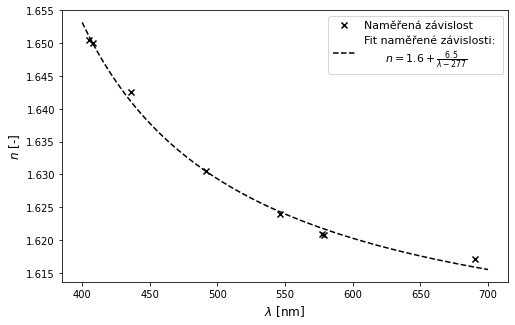

In [10]:
x_range = np.linspace(400,700,100)

plt.figure(figsize = (8,5))


plt.scatter(wl,n,color = 'k',marker='x',label = 'Naměřená závislost')
plt.plot(x_range,disp(x_range,n0,C,wl0), color = 'k', linestyle = 'dashed', label = "Fit naměřené závislosti: \n" + r"$\qquad n = 1.6 + \frac{6.5}{\lambda - 277}$")

#plt.legend(loc='upper right', fontsize=11)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=11)


plt.ylabel("$n$ " + "[-]", fontsize=12)
plt.xlabel("$\lambda$ [nm]", fontsize=12)

plt.savefig('disperze.pdf', bbox_inches = 'tight')
plt.show()

2.9045, 1.2332, 690.7
2.9105, 1.2271, 579.1
2.9110, 1.2266, 577.0
2.9161, 1.2215, 546.1
2.9267, 1.2094, 491.6
2.9490, 1.1901, 435.8
2.9616, 1.1765, 407.8
2.9620 1.1750   404.7

# Uloha 3

In [11]:
d1 = np.pi * (np.array([67,68,69])/180 + np.array([8,11,52])/(60*180) + np.array([55,43,20])/(60*60*180))
d2 = np.pi * (np.array([168,166,165])/180 + np.array([0,58,20])/(60*180) + np.array([32,52,34])/(60*60*180))
wl_t = np.array([434,486.1,656.3])
eps_arr = abs(d1 - d2)/2
eps = mean(eps_arr)
seps = error(eps_arr)
eps.round(2), seps.round(2)

(0.86, 0.01)

In [12]:
n = np.sin((eps_arr+phi)/2)/np.sin(phi/2)
sn = n*np.sqrt(seps**2/(np.cos(eps_arr+phi)**2)) 
n,sn

(array([1.64296097, 1.63255916, 1.61565815]),
 array([0.05269839, 0.05505262, 0.059395  ]))

In [13]:
l,refr = symbols('\lambda n')
eq1 = Eq(1.6 + 6.5/(l-277), refr)
solve(1.6 + 6.5/(l-277) - refr, l)


[0.5*(2770.0*n - 4367.0)/(5.0*n - 8.0)]

In [14]:
wl = 0.5*(2770.0*n - 4367.0)/(5.0*n - 8.0)
swl = wl*np.sqrt(2*(sn/n)**2)
print(wl)
print(swl)

[428.30011251 476.63660083 692.11929366]
[19.42823385 22.73062726 35.98291827]


In [15]:
k = np.array([5,4,3])
R = 10**9/((0.25-1/k**2)*wl)
sR = R*swl/((0.25-1/k**2)*wl)
R,sR

(array([11118149.68714338, 11189516.9696066 , 10402830.93670153]),
 array([2401587.17566429, 2845994.77845108, 3894031.52838375]))

In [16]:
R.round(-6),sR.round(-6)

(array([11000000., 11000000., 10000000.]),
 array([2000000., 3000000., 4000000.]))

In [17]:
10**9/(10973731*(0.25-1/k**2))

array([433.93671322, 486.00911881, 656.11231039])

In [18]:
T = np.array([d1.round(3),d2.round(3),eps_arr.round(3),n.round(2),sn.round(2),wl.round(0),swl.round(0),R.round(-6),sR.round(-6),wl_t]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrrrr}
\toprule
 1.172 & 2.932 & 0.88  & 1.64 & 0.05 & 428 & 19 & 1.1e+07 & 2e+06 & 434   \\
 1.19  & 2.914 & 0.862 & 1.63 & 0.06 & 477 & 23 & 1.1e+07 & 3e+06 & 486.1 \\
 1.22  & 2.886 & 0.833 & 1.62 & 0.06 & 692 & 36 & 1e+07   & 4e+06 & 656.3 \\
\bottomrule
\end{tabular}


# Uloha 4

In [19]:
d1 = np.pi * (np.array([165,165])/180 + np.array([58,47])/(60*180) + np.array([14,6])/(60*60*180))
d2 = np.pi * (np.array([69,69])/180 + np.array([25,13])/(60*180) + np.array([4,36])/(60*60*180))
eps_arr = abs(d1 - d2)/2
eps_arr

array([0.84258194, 0.84263042])

In [20]:
n = np.sin((eps_arr+phi)/2)/np.sin(phi/2)
sn = n*np.sqrt(seps**2/(np.cos(eps_arr+phi)**2)) 
n,sn

(array([1.62121257, 1.62124099]), array([0.05788982, 0.05788233]))

In [21]:
wl = 0.5*(2770.0*n - 4367.0)/(5.0*n - 8.0)
swl = wl*np.sqrt(2*(sn/n)**2)
print(wl)
print(swl)

[583.42209957 583.01210902]
[29.46185834 29.43682711]


In [22]:
dwl = wl[0]-wl[1]
sdwl = np.sqrt(2)*mean(swl)
dwl, sdwl

(0.4099905472616001, 41.64765988187195)

In [23]:
r = wl/dwl
r

array([1423.01353888, 1422.01353888])

In [24]:
a = r*(wl - wl0)**2/C
a*10**(-9)

array([0.02050933, 0.02043999])

In [35]:
T = np.array([d1.round(3),d2.round(3),eps_arr.round(5),n.round(2),sn.round(2),wl.round(3),swl.round(3)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrr}
\toprule
 2.897 & 1.212 & 0.84258 & 1.62 & 0.06 & 583.422 & 29.462 \\
 2.893 & 1.208 & 0.84263 & 1.62 & 0.06 & 583.012 & 29.437 \\
\bottomrule
\end{tabular}
